### **1. Предобработка текста**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('joined_with_onehot_to_use_final.csv')
df

,developer,username,review_date,rating,project_name,full_review_text,doc_id,sentiment_label,dev_norm,year_of_foundation,cnt_houses_built,estate_class_list,avg_sqm_price,Эконом,Комфорт,Бизнес,Премиум,years_on_market
0,Sminex,Василий,2024-12-13,5.0,Жилой квартал «Новое Пушкино»,"Чисто , поддерживается чистота это важно. Новы...",0,2,sminex,2001.0,44.0,Премиум,671443.0,0,0,0,1,24.0
1,Sminex,Ирина,2024-12-13,4.0,Жилой квартал «Новое Пушкино»,Нравится. Мне нравится территориальное располо...,1,2,sminex,2001.0,44.0,Премиум,671443.0,0,0,0,1,24.0
2,Sminex,Alina,2024-11-22,5.0,ЖК «Преображение»,Для меня все хорошо!. Живу тут со сдачи дома\n...,2,2,sminex,2001.0,44.0,Премиум,671443.0,0,0,0,1,24.0
3,Sminex,Галина,2024-11-17,4.0,Жилой квартал «Новое Пушкино»,"Вобщем, неплохо. Привлекла экология, удобное т...",3,2,sminex,2001.0,44.0,Премиум,671443.0,0,0,0,1,24.0
4,Sminex,Дарья Андреева,2024-11-15,4.0,ЖК «Вестердам»,Бывает и хуже. Мы выбрали исходя на тот момент...,4,2,sminex,2001.0,44.0,Премиум,671443.0,0,0,0,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,Optima Development,ID:22634321,2019-02-08,5.0,ЖК «Прайм Парк (Prime Park)»,"Современная недвижимость чем премиальней, тем ...",18045,2,optima development,2007.0,5.0,Премиум,632677.0,0,0,0,1,18.0
18044,Optima Development,Карлова Лена,2018-12-24,5.0,ЖК «Прайм Парк (Prime Park)»,"Наконец-то в Москве развиваются ЖК, которые по...",18046,2,optima development,2007.0,5.0,Премиум,632677.0,0,0,0,1,18.0
18045,Optima Development,ID:8000626,2018-07-18,3.0,ЖК «Прайм Парк (Prime Park)»,"Как относится к ДДУ, где нет четкого обязатель...",18047,1,optima development,2007.0,5.0,Премиум,632677.0,0,0,0,1,18.0
18046,Optima Development,ID:17140900,2018-07-03,5.0,ЖК «Прайм Парк (Prime Park)»,Купил квартиру. Очень доволен. Действительно с...,18048,2,optima development,2007.0,5.0,Премиум,632677.0,0,0,0,1,18.0


In [ ]:
int_cols = ['year_of_foundation', 'cnt_houses_built', 'years_on_market']
for col in int_cols:
    df[col] = df[col].astype(int)

In [ ]:
df = df[df['sentiment_label'] != 1].reset_index(drop=True)

In [ ]:
!pip install Natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 140.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b5298f11dfeb7061ed2ed2e8f770db08b69f7e81f55a9b4eb2d23ef700925e06
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=32c80b0726f63146431cd571a94472dd1c25055b01b0308930febe8d5576308b
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built docopt intervaltree


In [ ]:
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def lemmatize_text(text: str) -> str:
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)

    lemmas = [token.lemma for token in doc.tokens if token.lemma is not None and token.lemma.isalpha()]
    return ' '.join(lemmas)

In [ ]:
df['lemmatized_text'] = df['full_review_text'].astype(str).apply(lemmatize_text)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
text_embeddings = model.encode(df['lemmatized_text'].tolist(), show_progress_bar=True)
text_embeddings = np.array(text_embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/524 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['rating', 'years_on_market', 'avg_sqm_price', 'cnt_houses_built']

df['avg_sqm_price_log'] = np.log1p(df['avg_sqm_price'])
df['cnt_houses_built_log'] = np.log1p(df['cnt_houses_built'])
df['rating_log'] = df['rating']
df['years_on_market_log'] = np.log1p(df['years_on_market'])

scaler = MinMaxScaler()
df[['rating_norm', 'years_on_market_norm', 'avg_sqm_price_norm', 'cnt_houses_built_norm']] = scaler.fit_transform(
    df[['rating_log', 'years_on_market_log', 'avg_sqm_price_log', 'cnt_houses_built_log']])

In [ ]:
# Числовые признаки (нормализованные) с весом 0.3
numeric_matrix = df[['rating_norm', 'years_on_market_norm', 'avg_sqm_price_norm', 'cnt_houses_built_norm']].values
numeric_matrix_weighted = numeric_matrix * 0.3

# Категориальные one-hot признаки с весом 0.1
category_columns = ["Эконом", "Комфорт", "Бизнес", "Премиум"]
if all(col in df.columns for col in category_columns):
    category_matrix = df[category_columns].values.astype(float)
else:
    category_matrix = np.empty((len(df), 0))

category_matrix_weighted = category_matrix * 0.1

In [ ]:
# Объединение эмбеддингов и всех признаков в одну матрицу признаков X_all
X_all = np.hstack([text_embeddings, numeric_matrix_weighted, category_matrix_weighted])
print("Размер матрицы признаков X_all:", X_all.shape)

Размер матрицы признаков X_all: (16741, 776)


### **Кластеризация отзывов K-Means/HDBSCAN**

In [ ]:
import umap.umap_ as umap

reducer_100 = umap.UMAP(n_components=100, metric='cosine', random_state=42)
X_reduced_100 = reducer_100.fit_transform(X_all)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определение оптимального числа кластеров (силуэт и локоть)
possible_k = list(range(2, 16))
silhouette_scores = []
inertias = []
X_for_clustering = X_reduced_100.copy()

from sklearn.preprocessing import normalize
X_for_clustering = normalize(X_for_clustering)

for k in possible_k:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    labels_temp = kmeans_temp.fit_predict(X_for_clustering)
    inertias.append(kmeans_temp.inertia_)

    sil_score = silhouette_score(X_for_clustering, labels_temp, metric='euclidean')
    silhouette_scores.append(sil_score)
    print(f"K={k}: силуэт={sil_score:.3f}, инерция={kmeans_temp.inertia_:.0f}")

K=2: силуэт=0.284, инерция=29
K=3: силуэт=0.271, инерция=23
K=4: силуэт=0.283, инерция=20
K=5: силуэт=0.277, инерция=17
K=6: силуэт=0.279, инерция=16
K=7: силуэт=0.268, инерция=15
K=8: силуэт=0.256, инерция=14
K=9: силуэт=0.254, инерция=14
K=10: силуэт=0.258, инерция=13
K=11: силуэт=0.256, инерция=13
K=12: силуэт=0.254, инерция=12
K=13: силуэт=0.258, инерция=12
K=14: силуэт=0.253, инерция=11
K=15: силуэт=0.227, инерция=12


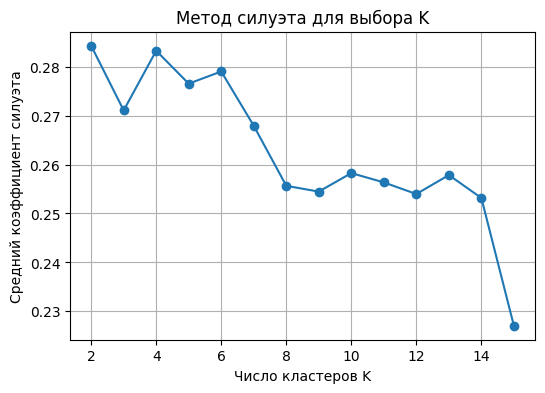

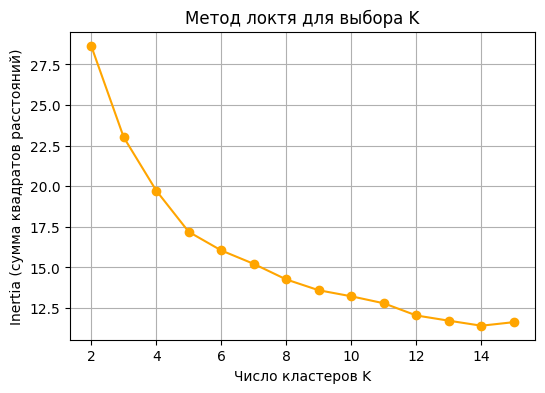

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(possible_k, silhouette_scores, marker='o')
plt.xlabel('Число кластеров K')
plt.ylabel('Средний коэффициент силуэта')
plt.title('Метод силуэта для выбора K')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(possible_k, inertias, marker='o', color='orange')
plt.xlabel('Число кластеров K')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для выбора K')
plt.grid(True)
plt.show()

In [ ]:
# Кластеризация KMeans с выбранным K по косинусной метрике
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
labels_km = kmeans.fit_predict(X_for_clustering)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


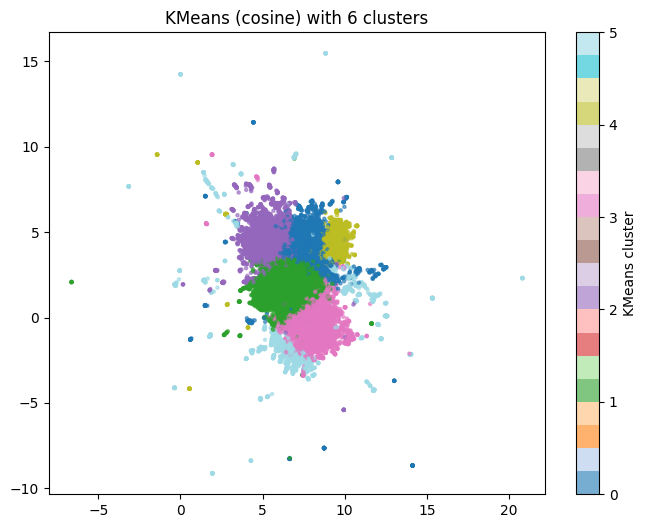

In [ ]:
reducer_2d = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_reduced_2d = reducer_2d.fit_transform(X_all)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced_2d[:,0], X_reduced_2d[:,1], c=labels_km, cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='KMeans cluster')
plt.title(f"KMeans (cosine) with {n_clusters} clusters")
plt.show()

In [ ]:
df['cluster_km'] = labels_km

In [ ]:
df

,developer,username,review_date,rating,project_name,full_review_text,doc_id,sentiment_label,dev_norm,year_of_foundation,...,lemmatized_text,avg_sqm_price_log,cnt_houses_built_log,rating_log,years_on_market_log,rating_norm,years_on_market_norm,avg_sqm_price_norm,cnt_houses_built_norm,cluster_km
0,Sminex,Василий,2024-12-13,5.0,Жилой квартал «Новое Пушкино»,"Чисто , поддерживается чистота это важно. Новы...",0,2,sminex,2001,...,чисто поддерживаться чистота это важный новый ...,13.417186,3.806662,5.0,3.218876,1.00,0.804728,0.577754,0.532700,2
1,Sminex,Ирина,2024-12-13,4.0,Жилой квартал «Новое Пушкино»,Нравится. Мне нравится территориальное располо...,1,2,sminex,2001,...,нравиться я нравиться территориальный располож...,13.417186,3.806662,4.0,3.218876,0.75,0.804728,0.577754,0.532700,5
2,Sminex,Alina,2024-11-22,5.0,ЖК «Преображение»,Для меня все хорошо!. Живу тут со сдачи дома\n...,2,2,sminex,2001,...,для я весь хороший жить тут с сдача дом неплох...,13.417186,3.806662,5.0,3.218876,1.00,0.804728,0.577754,0.532700,2
3,Sminex,Галина,2024-11-17,4.0,Жилой квартал «Новое Пушкино»,"Вобщем, неплохо. Привлекла экология, удобное т...",3,2,sminex,2001,...,вобщий неплохо привлечь экология удобный транс...,13.417186,3.806662,4.0,3.218876,0.75,0.804728,0.577754,0.532700,4
4,Sminex,Дарья Андреева,2024-11-15,4.0,ЖК «Вестердам»,Бывает и хуже. Мы выбрали исходя на тот момент...,4,2,sminex,2001,...,бывать и плохой мы выбрать исходить на тот мом...,13.417186,3.806662,4.0,3.218876,0.75,0.804728,0.577754,0.532700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16736,Optima Development,Вау Сэй,2019-03-30,5.0,ЖК «Прайм Парк (Prime Park)»,Влюбилась в проект. Забронировала квартиру. Оч...,18044,2,optima development,2007,...,влюбиться в проект забронировать квартира очен...,13.357717,1.791759,5.0,2.944439,1.00,0.684217,0.560662,0.250737,3
16737,Optima Development,ID:22634321,2019-02-08,5.0,ЖК «Прайм Парк (Prime Park)»,"Современная недвижимость чем премиальней, тем ...",18045,2,optima development,2007,...,современный недвижимость чем премиальней тем б...,13.357717,1.791759,5.0,2.944439,1.00,0.684217,0.560662,0.250737,1
16738,Optima Development,Карлова Лена,2018-12-24,5.0,ЖК «Прайм Парк (Prime Park)»,"Наконец-то в Москве развиваются ЖК, которые по...",18046,2,optima development,2007,...,в москва развиваться жк который подходить этот...,13.357717,1.791759,5.0,2.944439,1.00,0.684217,0.560662,0.250737,4
16739,Optima Development,ID:17140900,2018-07-03,5.0,ЖК «Прайм Парк (Prime Park)»,Купил квартиру. Очень доволен. Действительно с...,18048,2,optima development,2007,...,купить квартира очень довольный действительно ...,13.357717,1.791759,5.0,2.944439,1.00,0.684217,0.560662,0.250737,1


### **Тематическое моделирование: c-TF-IDF для ключевых слов кластеров**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")

# Формируем DataFrame для кластеров KMeans
docs_df_kmeans = pd.DataFrame({
    'Doc': df['lemmatized_text'].astype(str),
    'Topic': labels_km,
    'Doc_ID': range(len(df))
})

# Объединяем тексты по темам
docs_per_topic_kmeans = docs_df_kmeans.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range,
                            stop_words=russian_stopwords).fit(documents)

    t = count.transform(documents).toarray()
    w = t.sum(axis=1)

    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)

    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic_kmeans.Doc.values, m=len(docs_df_kmeans))

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc":  "Size"},axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic_kmeans, n=20)
topic_sizes = extract_topic_sizes(docs_df_kmeans); topic_sizes.head(10)

,Topic,Size
1,1,4779
2,2,3309
3,3,3243
0,0,2554
4,4,1474
5,5,1382


In [ ]:
for topic_id in topic_sizes['Topic'].head(10):
    print(f"\nТема {topic_id} (размер = {topic_sizes[topic_sizes['Topic'] == topic_id]['Size'].values[0]})")
    for word, score in top_n_words[topic_id]:
        print(f"{word:<20} {score}")


Тема 1 (размер = 4779)
планировка           0.014087741287357418
отделка              0.012256503957779484
дом                  0.01148017639568946
искать               0.011307398299428586
купить               0.01106496119195472
цена                 0.010933981644143796
комплекс             0.01082841054115756
окно                 0.010470755120645985
вариант              0.010389386231382117
очень                0.010274182902475809
хороший              0.010106015134079275
проект               0.009977711165449158
пока                 0.009899447119380983
понравиться          0.009838768926817742
застройщик           0.009788533778732376
район                0.009748986183322463
вид                  0.009449530531083909
свой                 0.009338281489413337
взять                0.008745816502387739
большой              0.008586243984011872

Тема 2 (размер = 3309)
ребенок              0.02382625559530918
школа                0.023335651044323863
детский              0.022536251

### Linear Regression S-score

In [ ]:
from sklearn.linear_model import LinearRegression

# Формируем матрицу признаков для регрессии: one-hot для кластеров
cluster_labels = df['cluster_km'].values.reshape(-1, 1)

# Преобразуем в one-hot (каждый кластер - отдельный признак)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_clusters_ohe = enc.fit_transform(cluster_labels)
print("Размер матрицы one-hot кластеров:", X_clusters_ohe.shape)

Размер матрицы one-hot кластеров: (16741, 6)


In [ ]:
# 3.2. Линейная регрессия: rating ~ cluster_dummies (без intercept)
y = df['rating'].values
lr = LinearRegression(fit_intercept=False)
lr.fit(X_clusters_ohe, y)
# коэффициенты для каждого кластера (в порядке возрастания номеров кластеров)
coeffs = lr.coef_
# Проверим соответствие количества коэффициентов количеству кластеров
print(f"Число коэффициентов регрессии: {len(coeffs)}, число кластеров: {X_clusters_ohe.shape[1]}")

Число коэффициентов регрессии: 6, число кластеров: 6


In [ ]:
# 3.3. Нормализация весов тем (коэффициентов) к диапазону [0,1]
coef_min = coeffs.min()
coef_max = coeffs.max()
if coef_max - coef_min == 0:
    # На случай, если все коэффициенты равны (что маловероятно) - избежим деления на 0
    normalized_weights = np.zeros_like(coeffs)
else:
    normalized_weights = (coeffs - coef_min) / (coef_max - coef_min)

In [ ]:
# 3.4. Расчет S-score для каждого застройщика
# Подготовим словарь весов тем (кластеров)
cluster_weights = {cluster: w for cluster, w in enumerate(normalized_weights)}

# Определим метки для позитивных и негативных отзывов
# Предположительно: sentiment_label = 2 для позитивных, = 0 для негативных (после фильтрации)
pos_label = 2
neg_label = 0

# Считаем общее число отзывов у каждого застройщика (для вычисления долей)
total_reviews_by_dev = df.groupby('developer').size().to_dict()

s_scores_km = {}  # словарь для S-score
# Группируем по разработчику и кластеру с разметкой позитив/негатив
pos_counts = df[df['sentiment_label'] == pos_label].groupby(['developer', 'cluster_km']).size().to_dict()
neg_counts = df[df['sentiment_label'] == neg_label].groupby(['developer', 'cluster_km']).size().to_dict()

developers = df['developer'].unique()
for dev in developers:
    total = total_reviews_by_dev.get(dev, 0)
    if total == 0:
        continue
    s_value = 0.0
    # Для каждого кластера суммируем взвешенную разность долей
    for cluster, w in cluster_weights.items():
        # Число позитивных и негативных отзывов данного застройщика в этом кластере
        pos_count = pos_counts.get((dev, cluster), 0)
        neg_count = neg_counts.get((dev, cluster), 0)
        # Доли (от общего числа отзывов застройщика)
        p_share = pos_count / total
        n_share = neg_count / total
        # Вклад в S-score
        s_value += w * (p_share - n_share)
    s_scores_km[dev] = s_value

In [ ]:
s_score_km_df = pd.DataFrame({
    'developer': list(s_scores_km.keys()),
    's_score_kmeans': list(s_scores_km.values())
})
print("Пример расчета S-score:")
print(s_score_km_df.head())

Пример расчета S-score:
          developer  s_score_kmeans
0            Sminex        0.668719
1    Группа Самолет        0.648632
2        Группа ПИК        0.668080
3  Галс-Девелопмент        0.786685
4   AFI Development        0.571997


In [ ]:
# 3.6. Оценка качества регрессионной модели
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = lr.predict(X_clusters_ohe)
r2 = lr.score(X_clusters_ohe, y)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Качество модели: R^2 = {r2:.3f}, MAE = {mae:.3f}, RMSE = {rmse:.3f}")

Качество модели: R^2 = 0.242, MAE = 0.723, RMSE = 1.102


In [ ]:
s_score_km_df = s_score_km_df.sort_values(by='s_score_kmeans', ascending=False).reset_index(drop=True)
s_score_km_df

,developer,s_score_kmeans
0,October Group,0.939250
1,FORMA,0.811814
2,Галс-Девелопмент,0.786685
3,Element,0.785540
4,ДОНСТРОЙ,0.758134
5,RBI,0.745845
6,А101,0.738725
7,Строительный холдинг Сенатор,0.736669
8,Optima Development,0.732330
9,Группа Эталон,0.724987


#### S-score with log-regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from scipy.special import logit

In [ ]:
# Получаем признаки
X = df[['cluster_km']]
y = df['sentiment_label']

# One-hot кодируем кластеры
encoder = OneHotEncoder(sparse_output=False, drop=None)
X_encoded = encoder.fit_transform(X)

In [ ]:
# Обучаем логистическую регрессию
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
logreg.fit(X_encoded, y)

# Получаем коэффициенты
cluster_coeffs = logreg.coef_[0]
cluster_weights_logreg = {i: coeff for i, coeff in enumerate(cluster_coeffs)}

In [ ]:
# Подсчет количества отзывов по застройщикам и кластерам
pos_label = 2
neg_label = 0

total_reviews_by_dev = df.groupby('developer').size().to_dict()
pos_counts = df[df['sentiment_label'] == pos_label].groupby(['developer', 'cluster_km']).size().to_dict()
neg_counts = df[df['sentiment_label'] == neg_label].groupby(['developer', 'cluster_km']).size().to_dict()

In [ ]:
# Расчет S-score логистической
s_scores_logreg = {}
developers = df['developer'].unique()
for dev in developers:
    total = total_reviews_by_dev.get(dev, 0)
    if total == 0:
        continue
    s_value = 0.0
    for cluster, w in cluster_weights_logreg.items():
        pos_count = pos_counts.get((dev, cluster), 0)
        neg_count = neg_counts.get((dev, cluster), 0)
        p_share = pos_count / total
        n_share = neg_count / total
        s_value += w * (p_share - n_share)
    s_scores_logreg[dev] = s_value

# Нормализация
s_values = np.array(list(s_scores_logreg.values()))
s_values_norm = (s_values - s_values.min()) / (s_values.max() - s_values.min())

In [ ]:
s_score_df_logreg = pd.DataFrame({
    'developer': list(s_scores_logreg.keys()),
    's_score_logreg': s_values_norm
})

s_score_df_logreg.sort_values(by='s_score_logreg', ascending=False).reset_index(drop=True)

,developer,s_score_logreg
0,October Group,1.000000
1,FORMA,0.828752
2,Галс-Девелопмент,0.815572
3,Element,0.800825
4,ДОНСТРОЙ,0.799591
5,RBI,0.794570
6,Группа Эталон,0.783039
7,А101,0.774174
8,Строительный холдинг Сенатор,0.768161
9,Optima Development,0.757913


In [ ]:
# Средний рейтинг по девелоперам
mean_ratings = df.groupby('developer')['rating'].mean().reset_index()
mean_ratings.columns = ['developer', 'avg_rating']

s_min = s_score_df_logreg['s_score_logreg'].min()
s_max = s_score_df_logreg['s_score_logreg'].max()
s_score_df_logreg['s_sco=re_logreg_scaled'] = 5 * (s_score_df_logreg['s_score_logreg'] - s_min) / (s_max - s_min)

# Объединяем с индексом
validation_df = s_score_df_logreg.merge(mean_ratings, on='developer')
validation_df.sort_values(by='avg_rating', ascending=False).reset_index(drop=True)

,developer,s_score_logreg,s_score_logreg_scaled,avg_rating
0,October Group,1.000000,5.000000,4.905660
1,FORMA,0.828752,4.143758,4.838235
2,Element,0.800825,4.004123,4.829545
3,Галс-Девелопмент,0.815572,4.077861,4.717105
4,Строительный холдинг Сенатор,0.768161,3.840803,4.711111
5,ДОНСТРОЙ,0.799591,3.997955,4.697211
6,Группа Аквилон,0.723632,3.618160,4.643087
7,Брусника,0.732522,3.662609,4.642857
8,RBI,0.794570,3.972852,4.627027
9,Optima Development,0.757913,3.789563,4.578348


In [ ]:
from sklearn.metrics import roc_auc_score
from scipy.stats import spearmanr

y_pred = logreg.predict_proba(X_encoded)[:, 1]

# McFadden's Pseudo R²
epsilon = 1e-15
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

p_null = np.mean(y)
p_null = np.clip(p_null, epsilon, 1 - epsilon)  # защита от log(0)

log_likelihood_full = np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
log_likelihood_null = np.sum(y * np.log(p_null) + (1 - y) * np.log(1 - p_null))
pseudo_r2 = 1 - (log_likelihood_full / log_likelihood_null)
print(f"McFadden's Pseudo R²: {pseudo_r2:.4f}")

# ROC - AUC
auc = roc_auc_score(y, y_pred)
print(f"ROC-AUC: {auc:.4f}")

# Gini
gini = 2 * auc - 1
print(f"Gini: {gini:.4f}")

# Корреляция Спирмана
y_pred_val = validation_df['s_score_logreg_scaled']
y_true_val = validation_df['avg_rating']
r_spear, _ = spearmanr(y_true_val, y_pred_val)
print(f"Spearman rank correlation between normalized s-score and average rating: {r_spear:.3f}")

McFadden's Pseudo R²: 0.9180
ROC-AUC: 0.8296
Gini: 0.6591
Spearman rank correlation between normalized s-score and average rating: 0.897


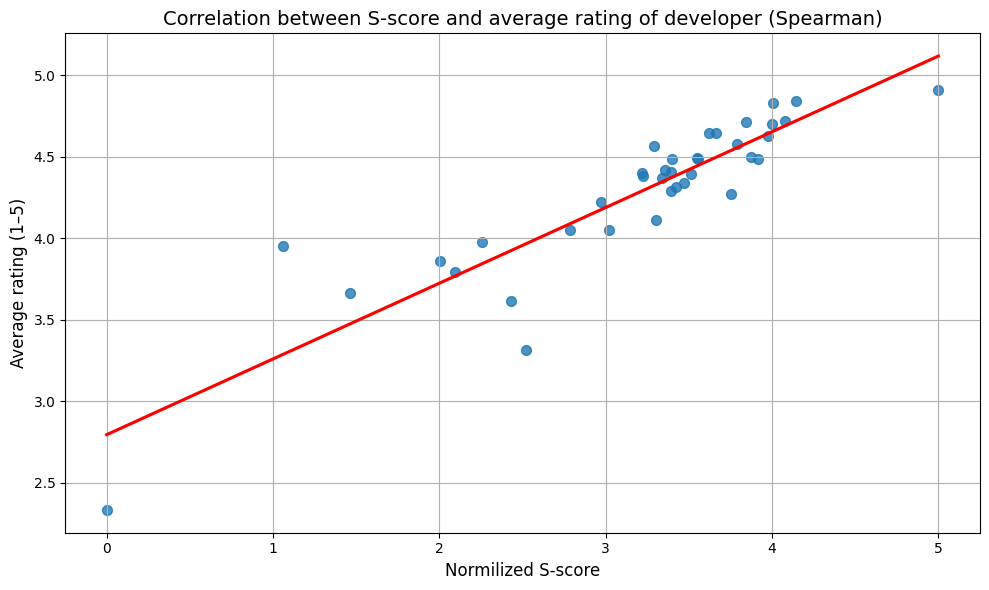

In [ ]:
import seaborn as sns

# Строим scatterplot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=validation_df,
    x='s_score_logreg_scaled',
    y='avg_rating',
    ci=None,
    scatter_kws={'s': 50, 'alpha': 0.8},
    line_kws={'color': 'red'}
)
plt.title("Correlation between S-score and average rating of developer (Spearman)", fontsize=14)
plt.xlabel("Normilized S-score", fontsize=12)
plt.ylabel("Average rating (1–5)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### HDBSCAN clusterisation

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.5 MB/s eta 0:00:00


In [ ]:
import hdbscan
import optuna
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

X_for_hdbscan = normalize(X_reduced_100)

# Вариант 1: Подбор через Optuna (максимизация silhouette_score)
def objective(trial):
    min_cluster_size = trial.suggest_int("min_cluster_size", 10, 50)
    min_samples = trial.suggest_int("min_samples", 1, 20)

    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric="euclidean"
    )
    labels = clusterer.fit_predict(X_for_hdbscan)

    mask = labels != -1
    if len(set(labels[mask])) < 2:
        return -1.0

    score = silhouette_score(X_for_hdbscan[mask], labels[mask])
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

best_params = study.best_params

[I 2025-05-27 10:22:22,634] A new study created in memory with name: no-name-628eac91-cb40-4055-87cf-b639be135aad
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 10:22:49,154] Trial 0 finished with value: 0.35584545135498047 and parameters: {'min_cluster_size': 24, 'min_samples': 2}. Best is trial 0 with value: 0.35584545135498047.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was ren

In [ ]:
print("Best hyperparameters for silhouette:", study.best_params)

Best hyperparameters for silhouette: {'min_cluster_size': 15, 'min_samples': 9}


In [ ]:
def optimize_min_noise():
    best_ratio = 1.0
    best_config = None

    for min_cluster_size in range(10, 51, 5):
        for min_samples in [1, 3, 5, 10, 15, 20]:
            clusterer = hdbscan.HDBSCAN(
                min_cluster_size=min_cluster_size,
                min_samples=min_samples,
                metric='euclidean'
            )
            labels = clusterer.fit_predict(X_for_hdbscan)
            noise_ratio = np.mean(labels == -1)

            if noise_ratio < best_ratio and len(set(labels)) > 2:
                best_ratio = noise_ratio
                best_config = {
                    "min_cluster_size": min_cluster_size,
                    "min_samples": min_samples,
                    "noise_ratio": noise_ratio
                }

    return best_config

best_noise_config = optimize_min_noise()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
print("Best hyperparameters for noise minimization:", best_noise_config)

Best hyperparameters for noise minimization: {'min_cluster_size': 30, 'min_samples': 1, 'noise_ratio': np.float64(0.03589988650618243)}


In [ ]:
X_for_hdbscan = X_reduced_100

X_for_hdbscan = normalize(X_for_hdbscan)

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=9, metric='euclidean')
labels_hdb = clusterer.fit_predict(X_for_hdbscan)
n_clusters_hdb = len(set(labels_hdb) - {-1})
print(f"HDBSCAN нашел кластеров: {n_clusters_hdb}, выбросов: {(labels_hdb == -1).sum()}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN нашел кластеров: 113, выбросов: 11143


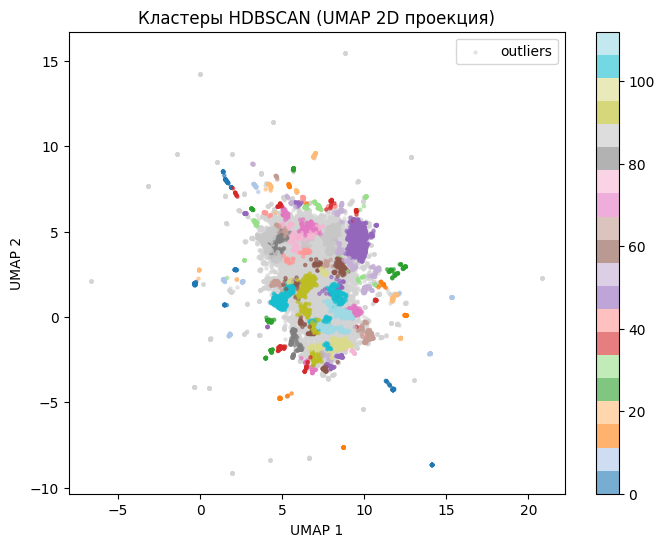

In [ ]:
# 4.3. Визуализация кластеров HDBSCAN на 2D проекции
plt.figure(figsize=(8,6))
outlier_mask = (labels_hdb == -1)
# Точки-выбросы
plt.scatter(X_reduced_2d[outlier_mask,0], X_reduced_2d[outlier_mask,1], c='lightgray', s=5, alpha=0.5, label='outliers')
# Точки кластеров
plt.scatter(X_reduced_2d[~outlier_mask,0], X_reduced_2d[~outlier_mask,1], c=labels_hdb[~outlier_mask], cmap='tab20', s=5, alpha=0.6)
plt.colorbar()
plt.title('Кластеры HDBSCAN (UMAP 2D проекция)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(loc='upper right')
plt.savefig('hdbscan_clusters_2d.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")

# Формируем DataFrame для кластеров KMeans
docs_df_hdbscan = pd.DataFrame({
    'Doc': df['lemmatized_text'].astype(str),
    'Topic': labels_hdb,
    'Doc_ID': range(len(df))
})

# Объединяем тексты по темам
docs_per_topic_hdbscan = docs_df_hdbscan.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range,
                            stop_words=russian_stopwords).fit(documents)

    t = count.transform(documents).toarray()
    w = t.sum(axis=1)

    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)

    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

tf_idf_hdbscan, count_hdbscan = c_tf_idf(docs_per_topic_hdbscan.Doc.values, m=len(docs_df_hdbscan))

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc":  "Size"},axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words_hdbscan = extract_top_n_words_per_topic(tf_idf_hdbscan, count_hdbscan, docs_per_topic_hdbscan, n=20)
topic_sizes_hdbscan = extract_topic_sizes(docs_df_hdbscan); topic_sizes_hdbscan.head(10)

,Topic,Size
0,-1,11143
49,48,1087
104,103,285
85,84,282
101,100,281
68,67,127
105,104,104
90,89,102
70,69,96
113,112,96


In [ ]:
for topic_id in topic_sizes_hdbscan['Topic'].head(10):
    print(f"\nТема {topic_id} (размер = {topic_sizes_hdbscan[topic_sizes_hdbscan['Topic'] == topic_id]['Size'].values[0]})")
    for word, score in top_n_words_hdbscan[topic_id]:
        print(f"{word:<20} {score}")


Тема -1 (размер = 11143)
дом                  0.010861713094181245
очень                0.010305413738459624
хороший              0.010274640696875772
район                0.01006910880180016
комплекс             0.009598539504402533
искать               0.009453825028022963
рядом                0.0094272441744834
застройщик           0.009135263372221366
цена                 0.008979838247528392
метро                0.008815231195568346
свой                 0.008787611222008801
двор                 0.008722337790332855
отделка              0.00871659650625925
место                0.008693309934823978
купить               0.00837806859847813
весь                 0.008238176670308201
жить                 0.00820880195149587
пока                 0.008188777402108782
год                  0.00815861925937153
территория           0.007954025531188008

Тема 48 (размер = 1087)
москва               0.04839008446296338
московский           0.017036678936689403
район                0.0152951726

In [ ]:
df["cluster_hdb"] = labels_hdb

In [ ]:
# One-hot представление кластеров HDBSCAN для регрессии
cluster_labels_hdb = df['cluster_hdb'].values.reshape(-1, 1)
X_clusters_hdb_ohe = enc.fit_transform(cluster_labels_hdb)
print("One-hot форма кластеров HDBSCAN:", X_clusters_hdb_ohe.shape)

One-hot форма кластеров HDBSCAN: (16741, 114)


In [ ]:
# Линейная регрессия: rating ~ cluster_hdb (OHE), без intercept
y_hdb = df['rating'].values
lr_hdb = LinearRegression(fit_intercept=False)
lr_hdb.fit(X_clusters_hdb_ohe, y_hdb)
coeffs_hdb = lr_hdb.coef_
print(f"Количество кластеров HDBSCAN: {X_clusters_hdb_ohe.shape[1]}, коэффициентов: {len(coeffs_hdb)}")

Количество кластеров HDBSCAN: 114, коэффициентов: 114


In [ ]:
# Нормализация весов тем HDBSCAN
coef_min_hdb = coeffs_hdb.min()
coef_max_hdb = coeffs_hdb.max()
if coef_max_hdb - coef_min_hdb == 0:
    normalized_weights_hdb = np.zeros_like(coeffs_hdb)
else:
    normalized_weights_hdb = (coeffs_hdb - coef_min_hdb) / (coef_max_hdb - coef_min_hdb)
cluster_weights_hdb = {cluster: w for cluster, w in enumerate(normalized_weights_hdb)}

In [ ]:
# Расчет S-score для каждой компании (HDBSCAN)
total_reviews_by_dev_hdb = df.groupby('developer').size().to_dict()
pos_counts_hdb = df[df['sentiment_label'] == pos_label].groupby(['developer', 'cluster_hdb']).size().to_dict()
neg_counts_hdb = df[df['sentiment_label'] == neg_label].groupby(['developer', 'cluster_hdb']).size().to_dict()

s_scores_hdb = {}
for dev in df['developer'].unique():
    total = total_reviews_by_dev_hdb.get(dev, 0)
    if total == 0:
        continue
    s_value = 0.0
    for cluster, w in cluster_weights_hdb.items():
        pos_count = pos_counts_hdb.get((dev, cluster), 0)
        neg_count = neg_counts_hdb.get((dev, cluster), 0)
        p_share = pos_count / total
        n_share = neg_count / total
        s_value += w * (p_share - n_share)
    s_scores_hdb[dev] = s_value

s_score_hdb_df = pd.DataFrame({
    'developer': list(s_scores_hdb.keys()),
    's_score_hdbscan': list(s_scores_hdb.values())
})
print("Пример S-score (HDBSCAN) - топ 5 записей:")
print(s_score_hdb_df.head())

Пример S-score (HDBSCAN) - топ 5 записей:
          developer  s_score_hdbscan
0            Sminex         0.180213
1    Группа Самолет         0.182929
2        Группа ПИК         0.237786
3  Галс-Девелопмент         0.261546
4   AFI Development         0.075916


In [ ]:
s_score_hdb_df.sort_values(by='s_score_hdbscan', ascending=False).reset_index(drop=True)

,developer,s_score_hdbscan
0,Балтийская жемчужина,0.264004
1,ДОНСТРОЙ,0.262045
2,Галс-Девелопмент,0.261546
3,Optima Development,0.261252
4,Capital Group,0.259231
5,October Group,0.252012
6,СК Дальпитерстрой,0.242928
7,Группа ПИК,0.237786
8,А101,0.221428
9,Группа компаний «ТРЕСТ»,0.219154


In [ ]:
y_pred_hdb = lr_hdb.predict(X_clusters_hdb_ohe)
r2_hdb = lr_hdb.score(X_clusters_hdb_ohe, y_hdb)
mae_hdb = mean_absolute_error(y_hdb, y_pred_hdb)
rmse_hdb = np.sqrt(mean_squared_error(y_hdb, y_pred_hdb))
print(f"Качество модели (HDBSCAN кластеры): R^2 = {r2_hdb:.3f}, MAE = {mae_hdb:.3f}, RMSE = {rmse_hdb:.3f}")

Качество модели (HDBSCAN кластеры): R^2 = 0.281, MAE = 0.691, RMSE = 1.073
